In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# https://www.kaggle.com/datasets/dinaouahbi/telecust
df = pd.read_csv('./../data/telecust1000t.csv')

In [5]:
df.sample(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
368,3,63,56,0,17,71.0,3,18,0.0,1,1,1
726,3,66,39,0,1,66.0,2,15,0.0,1,1,2
494,2,53,64,1,17,380.0,2,36,0.0,1,2,3
174,3,65,58,0,13,167.0,2,14,0.0,1,2,2
852,1,67,45,1,22,83.0,3,11,0.0,1,2,2


Text(0, 0.5, 'Count')

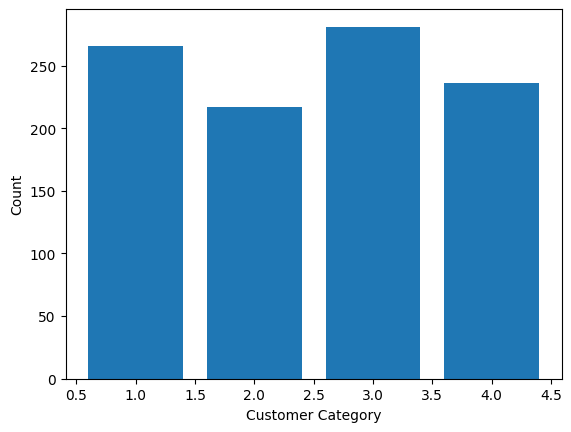

In [6]:
plt.bar(df['custcat'].value_counts().index, df['custcat'].value_counts())
plt.xlabel('Customer Category')
plt.ylabel('Count')

In [7]:
df.corr()['custcat'].sort_values(ascending=False)

custcat    1.000000
ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
retire     0.008908
gender    -0.004966
region    -0.023771
Name: custcat, dtype: float64

<Axes: >

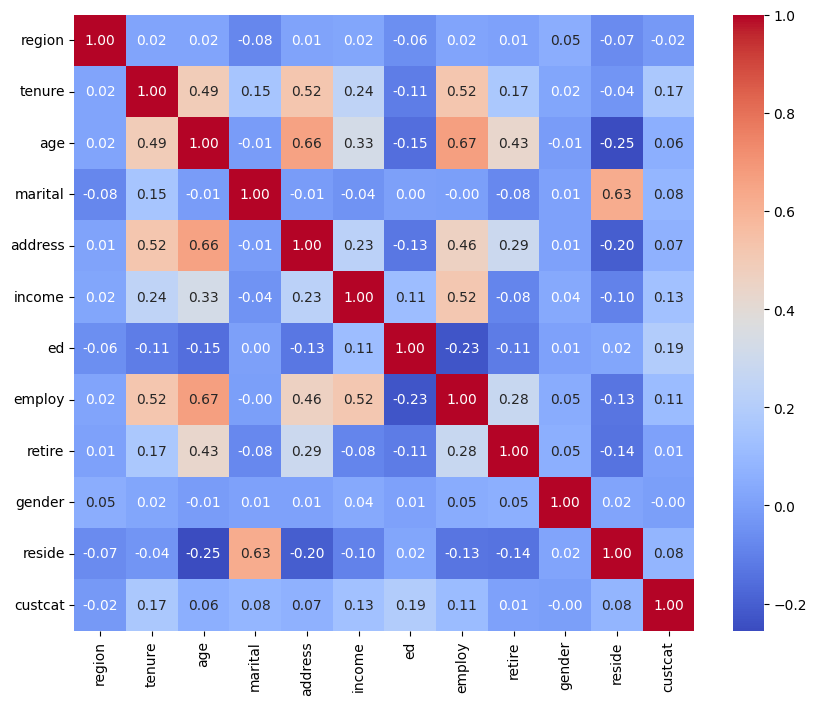

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [9]:
X = df.drop(['custcat'], axis=1)
y = df['custcat']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.33


In [15]:
accuracy = []
for k in range(1, 100):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy')

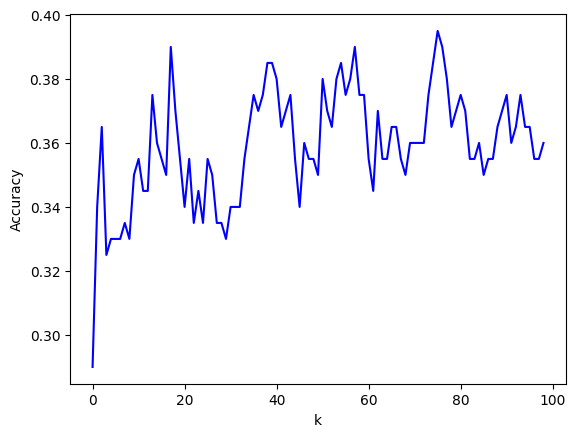

In [20]:
plt.plot(accuracy, color='blue')
plt.xlabel('k')
plt.ylabel('Accuracy')